   completion_time                                                src   start  \
0              NaN  2265679104422051516079441988368838930106885886...  300000   
1              NaN  2265679104422051516079441988368838930106885886...  300000   
2              NaN  2265679104422051516079441988368838930106885886...  300000   
3              NaN  2265679104422051516079441988368838930106885886...  300000   
4              NaN  7528967577193409051872594477748476684131138175...  300000   

   column validator completed           type  samples  block_id  \
0     NaN       NaN       NaN  FindOperation      NaN       NaN   
1     NaN       NaN       NaN  FindOperation      NaN       NaN   
2     NaN       NaN       NaN  FindOperation      NaN       NaN   
3     NaN       NaN       NaN  FindOperation      NaN       NaN   
4     NaN       NaN       NaN  FindOperation      NaN       NaN   

                                            messages  hops  id  row  
0  1070065|1070066|1070067|2351212|23512

Text(0.5, 0, 'Node id')

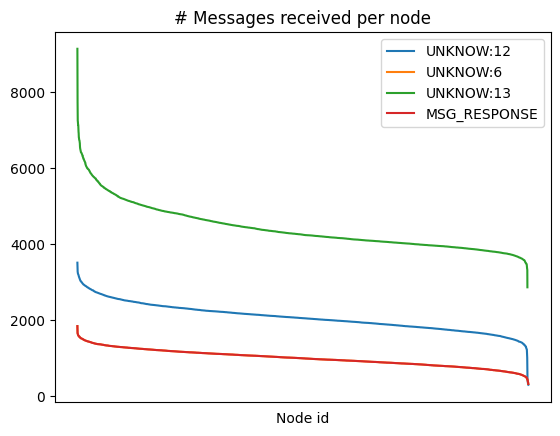

In [28]:
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd

ops_path = "../logs/operation.csv"
msgs_path = "../logs/messages.csv"

op_df = pd.read_csv(ops_path,index_col=False)
msg_df = pd.read_csv(msgs_path,index_col=False)

fig1, ax1 = plt.subplots()

msg_types = msg_df['type'].unique()

print(op_df.head())
print(op_df['type'].unique())
print(msg_df['type'].unique())

msg_df2 = msg_df.loc[(msg_df['dst'] !='83814183170291850251680823880522715558189094423550585243365458794131648333116')]
for types in msg_types:
    #print(types)
    df2 = msg_df2.loc[(msg_df2['type'] == types)]
    df2['dst'].value_counts().plot(ax=ax1, kind='line', xticks=[], title="Message received by node", label=types)

    #print(df2['dst'])

ax1.legend()

ax1.set_title("# Messages received per node")
ax1.set_xlabel("Node id")

Text(0.5, 1.0, '# Total messages per type')

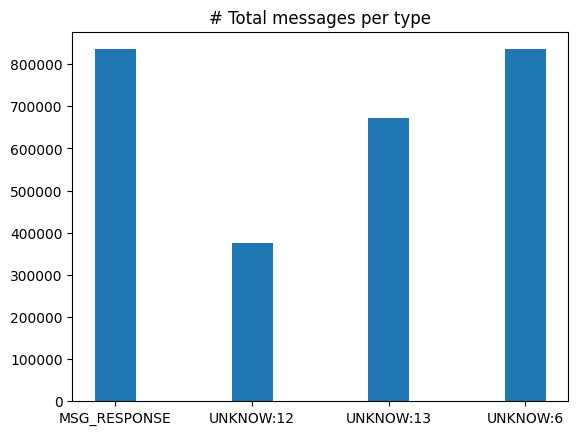

In [5]:

fig2, ax2 = plt.subplots()


table = msg_df2['type'].value_counts().sort_index()
ax2.bar(np.arange(len(table.index)),table.values,width=0.3)
ticks = table.index
ax2.set_xticks(range(len(ticks)))
ax2.set_xticklabels(ticks)


ax2.set_title("# Total messages per type")



../logsEvil0.1/operation.csv
../logsEvil0.2/operation.csv
../logsEvil0.3/operation.csv
../logsEvil0.4/operation.csv
../logsEvil0.5/operation.csv


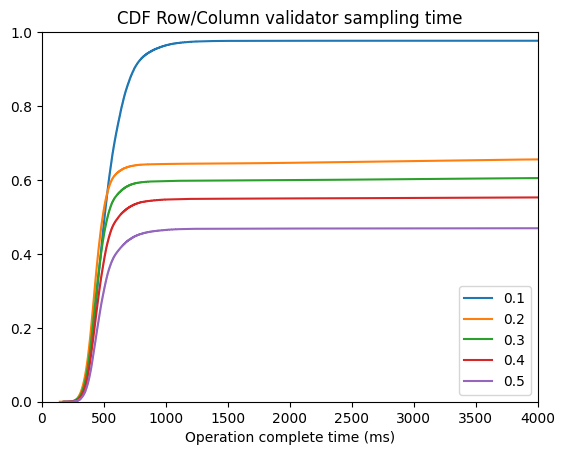

In [3]:
fig3, ax3 = plt.subplots()

evil_values = [0.1,0.2,0.3,0.4,0.5]
ops_path_evil  = "../logsEvil"

            
op_evil=[]
i = 0;

vsdf = op_df.loc[(op_df['type'] == 'ValidatorSamplingOperation')]
x = np.sort(vsdf['completion_time'])
N = vsdf['completion_time'].count()
y = np.arange(N) / float(N)
ax3.plot(x, y, label='0')

for val in evil_values:
    ops_path = ops_path_evil+str(val)+'/operation.csv'
    print(ops_path)
    op_evil.append(pd.read_csv(ops_path,index_col=False))

   # print(op_evil[i])        
    n_bins = 100
    vsdf = op_evil[i].loc[(op_evil[i]['type'] == 'ValidatorSamplingOperation')]
    #print(vsdf['completion_time'].median())
    #print(vsdf)
    #n, bins, patches = ax3.hist(vsdf['completion_time'], n_bins, density=True, histtype='step',
    #                          cumulative=True, label='Empirical')

    # sort the data in ascending order
    x = np.sort(vsdf['completion_time'])
    N = vsdf['completion_time'].count()
    # get the cdf values of y
    y = np.arange(N) / float(N)

    ax3.plot(x, y, label=val)
    i=i+1

ax3.set_xlim([0,4000])
ax3.set_ylim([0,1])
ax3.set_title("CDF Row/Column validator sampling time")
ax3.set_xlabel("Operation complete time (ms)")
ax3.legend()

Text(0.5, 0, '# hops')

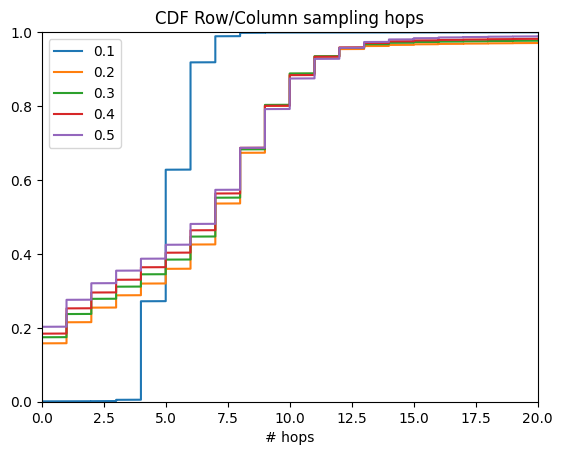

In [5]:
fig8, ax8 = plt.subplots()

i = 0;

vsdf = op_df.loc[(op_df['type'] == 'ValidatorSamplingOperation')]
x = np.sort(vsdf['hops'])
N = vsdf['hops'].count()
y = np.arange(N) / float(N)
ax8.plot(x, y, label='0')

for val in evil_values:


#n_bins = 100
    vsdf = op_evil[i].loc[(op_evil[i]['type'] == 'ValidatorSamplingOperation')]
    #print(op_df)
    #print(vsdf['hops'].mode())
    #n, bins, patches = ax8.hist(vsdf['hops'], n_bins, density=True, histtype='step',
    #                          cumulative=True, label='Empirical')

    x = np.sort(vsdf['hops'])
    N = vsdf['hops'].count()
    # get the cdf values of y
    y = np.arange(N) / float(N)
    i=i+1
    ax8.plot(x, y, label=val)

ax8.set_xlim([0,20])
ax8.set_ylim([0,1])
ax8.legend()
ax8.set_title("CDF Row/Column sampling hops")
ax8.set_xlabel("# hops")

Text(0.5, 0, 'Operation complete time (ms)')

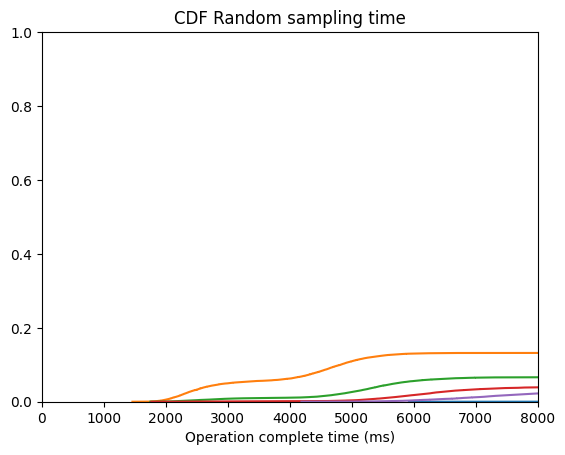

In [6]:
fig4, ax4 = plt.subplots()

i = 0;


vsdf = op_df.loc[(op_df['type'] == 'RandomSamplingOperation')]
x = np.sort(vsdf['completion_time'])
N = vsdf['completion_time'].count()
y = np.arange(N) / float(N)
ax4.plot(x, y, label='0')

for val in evil_values:

    #n_bins = 100
    rsdf =  op_evil[i].loc[(op_evil[i]['type'] == 'RandomSamplingOperation')]

    #n, bins, patches = ax4.hist(rsdf['completion_time'], n_bins, density=True, histtype='step',
    #                           cumulative=True, label='Empirical')

    x = np.sort(rsdf['completion_time'])
    N = rsdf['completion_time'].count()
    # get the cdf values of y
    y = np.arange(N) / float(N)
    i=i+1
    ax4.plot(x, y,label=val)

ax4.set_xlim([0,8000])
ax4.set_ylim([0,1])
ax4.legend()
ax4.set_title("CDF Random sampling time")
ax4.set_xlabel("Operation complete time (ms)")

Text(0.5, 0, '# hops')

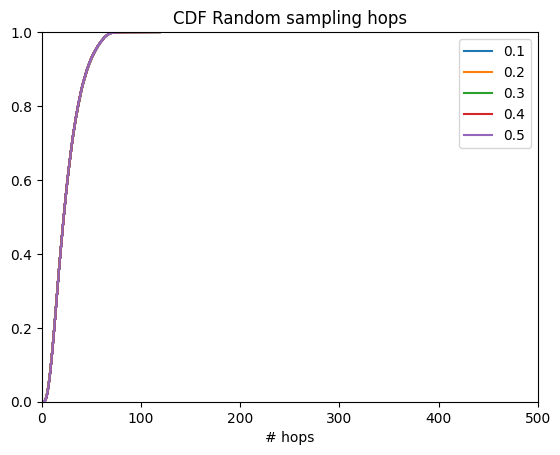

In [7]:
fig9, ax9 = plt.subplots()


i = 0;

vsdf = op_df.loc[(op_df['type'] == 'RandomSamplingOperation')]
x = np.sort(vsdf['hops'])
N = vsdf['hops'].count()
y = np.arange(N) / float(N)
ax9.plot(x, y, label='0')


for val in evil_values:

    #n_bins = 100
    rsdf = op_evil[i].loc[(op_evil[i]['type'] == 'RandomSamplingOperation')]
    #print(op_df)
    #print(vsdf['hops'].mode())
    #n, bins, patches = ax9.hist(vsdf['hops'], n_bins, density=True, histtype='step',
    #                           cumulative=True, label='Empirical')
    x = np.sort(rsdf['hops'])
    N = rsdf['hops'].count()
    # get the cdf values of y
    y = np.arange(N) / float(N)

    ax9.plot(x, y, label=val)

ax9.set_xlim([0,500])
ax9.set_ylim([0,1])
ax9.legend()

ax9.set_title("CDF Random sampling hops")
ax9.set_xlabel("# hops")

[1.0, 2.0, 3.0, 4.0]
[1.1, 2.1, 3.1, 4.1]
[1.2, 2.2, 3.2, 4.2]
[1.3, 2.3, 3.3, 4.3]
[1.4, 2.4, 3.4, 4.4]


Text(0.5, 1.0, 'Succesful / Non succesful operation')

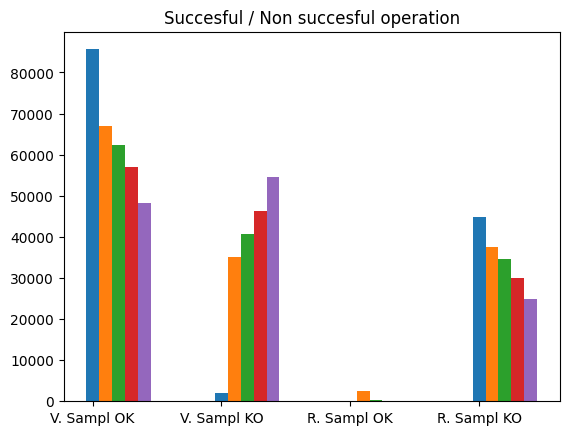

In [21]:
fig5, ax5 = plt.subplots()

i = 0;
width=0.1
for val in evil_values:

    rsdf = op_evil[i].loc[(op_evil[i]['type'] == 'RandomSamplingOperation')]
    rsdf_comp = rsdf.loc[(rsdf['completed'] == 'yes')]
    rsdf_nocomp = rsdf.loc[(rsdf['completed'] == 'no')]

    vsdf = op_evil[i].loc[(op_evil[i]['type'] == 'ValidatorSamplingOperation')]
    vsdf_comp = vsdf.loc[(vsdf['completed'] == 'yes')]
    vsdf_nocomp = vsdf.loc[(vsdf['completed'] == 'no')]


    vsdf_late = vsdf_comp['completion_time'][(vsdf_comp['completion_time']> 4000)]
    rsdf_late = rsdf_comp['completion_time'][(rsdf_comp['completion_time']> 8000)]

    #print(vsdf_late.count())
    #print(rsdf_late.count())

    index = []
    for x in range(1,5):
        index.append(x+width*i)
    values = []
    values.append(vsdf_comp['completion_time'].count()-vsdf_late.count())
    values.append(vsdf_nocomp['completion_time'].count()+vsdf_late.count())
    values.append(rsdf_comp['completion_time'].count()-rsdf_late.count())
    values.append(rsdf_nocomp['completion_time'].count()+rsdf_late.count())
    
    print(index)
    ax5.bar(index,values,label=val,width=width)
    i=i+1

ax5.set_xticks(range(1,5))
ax5.set_xticklabels(['V. Sampl OK','V. Sampl KO','R. Sampl OK','R. Sampl KO'])

ax5.set_title("Succesful / Non succesful operation")


Text(0.5, 0, 'Number of samples obtained')

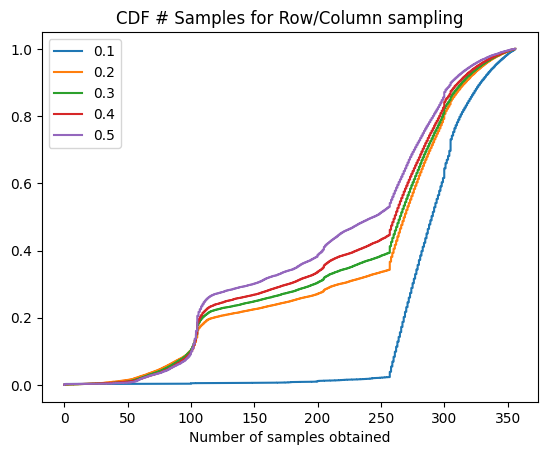

In [25]:
fig6, ax6 = plt.subplots()

i = 0;

vsdf = op_df.loc[(op_df['type'] == 'ValidatorSamplingOperation')]
x = np.sort(vsdf['samples'])
N = vsdf['samples'].count()
y = np.arange(N) / float(N)
ax6.plot(x, y, label='0')


for val in evil_values:
    
    n_bins = 100
    vsdf = op_evil[i].loc[(op_evil[i]['type'] == 'ValidatorSamplingOperation')]

    x = np.sort(vsdf['samples'])
    N = vsdf['samples'].count()
    # get the cdf values of y
    y = np.arange(N) / float(N)

    ax6.plot(x, y, label=val)

    #print(vsdf['samples'].mode())
    i=i+1
    #n, bins, patches = ax6.hist(vsdf['samples'], n_bins, density=True, histtype='step',
    #                        cumulative=True, label=val)

#ax6.set_xlim([0,4000])
ax6.legend()
ax6.set_title("CDF # Samples for Row/Column sampling")
ax6.set_xlabel("Number of samples obtained")

Text(0.5, 0, 'Number of samples obtained')

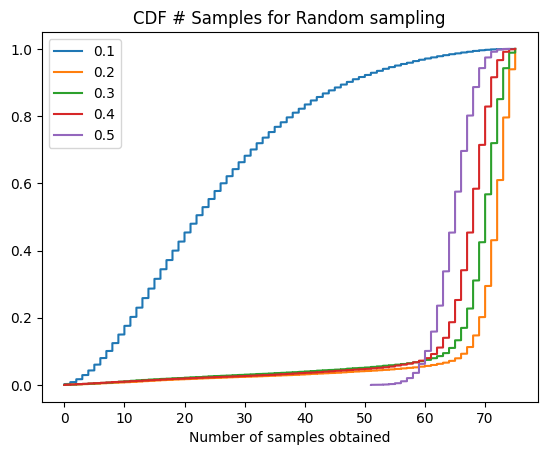

In [27]:
fig7, ax7 = plt.subplots()

#n_bins = 100
#vsdf = op_df.loc[(op_df['type'] == 'RandomSamplingOperation')]

#print(vsdf['samples'].mode())

#n, bins, patches = ax7.hist(vsdf['samples'], n_bins, density=True, histtype='step',
#                           cumulative=True, label='Empirical')
#ax6.set_xlim([0,4000])

i = 0;

vsdf = op_df.loc[(op_df['type'] == 'RandomSamplingOperation')]
x = np.sort(vsdf['samples'])
N = vsdf['samples'].count()
y = np.arange(N) / float(N)
ax7.plot(x, y, label='0')

for val in evil_values:
    
    n_bins = 100
    vsdf = op_evil[i].loc[(op_evil[i]['type'] == 'RandomSamplingOperation')]

    x = np.sort(vsdf['samples'])
    N = vsdf['samples'].count()
    # get the cdf values of y
    y = np.arange(N) / float(N)

    ax7.plot(x, y, label=val)

    #print(vsdf['samples'].mode())
    i=i+1

ax7.legend()
ax7.set_title("CDF # Samples for Random sampling")
ax7.set_xlabel("Number of samples obtained")